# Neural Network Fundamentals


## Linearly Separable Data Generation

Generate two clusters of points that can be linearly separated in 2D space:

- Use `np.random.randn()` to create two clusters of 100 points each, representing different classes
- Move the mean of each cluster to [-2, -2] and [2, 2] respectively
- Assign classes -1 and 1 to these clusters
- Combine and shuffle the points
- Return points and classes as numpy arrays of shape (N, 2) and (N, 1)

In [1]:
# Import the necessary library
import numpy as np

# Function to generate linearly separable data
def generate_linearly_separable_data():
    # Generate two clusters of 100 points each with standard normal distribution
    cluster1 = np.random.randn(100, 2) + np.array([-2, -2])  # shift mean to [-2, -2]
    cluster2 = np.random.randn(100, 2) + np.array([2, 2])    # shift mean to [2, 2]

    # Assign classes -1 to cluster1 and 1 to cluster2
    labels1 = np.full((100, 1), -1)
    labels2 = np.full((100, 1), 1)

    # Combine the points and labels
    points = np.vstack((cluster1, cluster2))
    labels = np.vstack((labels1, labels2))

    # Shuffle the combined points and labels
    indices = np.random.permutation(len(points))
    points_shuffled = points[indices]
    labels_shuffled = labels[indices]

    return points_shuffled, labels_shuffled

# Generate the data
points, labels = generate_linearly_separable_data()

# Display the shape of the generated arrays
print("Points shape:", points.shape)
print("Labels shape:", labels.shape)

# Display first few points and their labels
print("\nFirst 5 points:\n", points[:5])
print("First 5 labels:\n", labels[:5])


Points shape: (200, 2)
Labels shape: (200, 1)

First 5 points:
 [[-0.69470853 -2.15834668]
 [ 2.9033341   0.40985603]
 [-1.57473902 -1.88315105]
 [ 1.20271442  1.21956446]
 [-2.03151379 -2.85435867]]
First 5 labels:
 [[-1]
 [ 1]
 [-1]
 [ 1]
 [-1]]


## XOR Dataset Generation

Generate the XOR dataset:

- Four points: [[0, 0], [0, 1], [1, 0], [1, 1]]
- Classes: [-1, 1, 1, -1] (XOR logic)
- Return points and classes as numpy arrays

In [2]:
def generate_xor_data():
    # Define the 4 XOR points
    points = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

    # Compute XOR for each point and map [0, 1] to [-1, 1]
    labels = np.array([1 if x != y else -1 for x, y in points]).reshape(-1, 1)

    return points, labels

# Generate the XOR data and display
xor_points, xor_labels = generate_xor_data()
xor_points, xor_labels


(array([[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]),
 array([[-1],
        [ 1],
        [ 1],
        [-1]]))

## Data Visualization

Visualize the clusters and their labels using different colors with matplotlib.

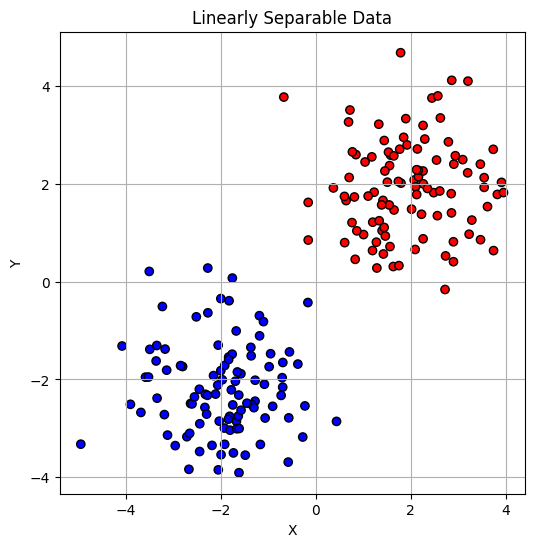

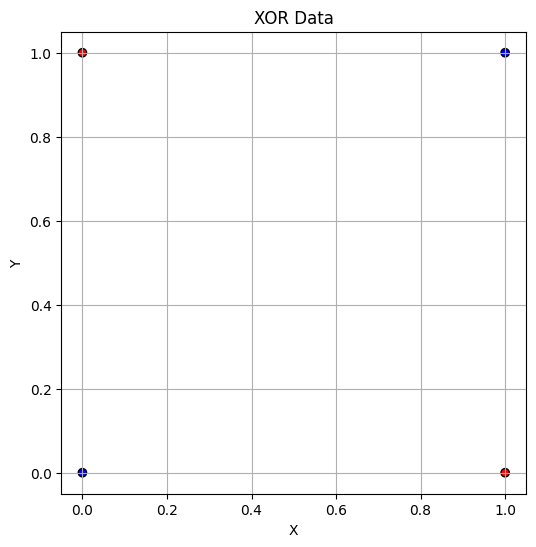

In [3]:
import matplotlib.pyplot as plt

def plot_data(points, labels, title="Data Visualization"):
    # Map labels from [-1, 1] to colors
    colors = ['blue' if label == -1 else 'red' for label in labels.flatten()]

    # Plot the data points with colors
    plt.figure(figsize=(6, 6))
    plt.scatter(points[:, 0], points[:, 1], c=colors, marker='o', edgecolor='k')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)
    plt.grid(True)
    plt.show()

# Visualize the linearly separable data
plot_data(points, labels, title="Linearly Separable Data")

# Visualize the XOR data
plot_data(xor_points, xor_labels, title="XOR Data")

## Linear SVM Classification

Using scikit-learn to find a decision boundary to separate the clusters:

1. Use `sklearn.svm.LinearSVC` to find a linear decision boundary for the linearly separable data
2. Predict the class of a new point [3, 3]
3. Attempt the same for the XOR dataset (non-linearly separable)

In [4]:
from sklearn.svm import LinearSVC

# Train a Linear SVM on the linearly separable data
linear_svc = LinearSVC()
linear_svc.fit(points, labels.ravel())  # ravel to flatten the labels array

# Display the coefficients and intercept of the decision boundary
linear_svc.coef_, linear_svc.intercept_

(array([[0.55776238, 0.9957271 ]]), array([-0.04792702]))

In [5]:
from sklearn.svm import LinearSVC

# Train a Linear SVM on the linearly separable data
linear_svc = LinearSVC()
linear_svc.fit(points, labels.ravel())  # ravel to flatten the labels array

# Display the coefficients and intercept of the decision boundary
print("Coefficients:", linear_svc.coef_)
print("Intercept:", linear_svc.intercept_)


Coefficients: [[0.55776238 0.9957271 ]]
Intercept: [-0.04792702]


In [6]:
from sklearn.svm import LinearSVC

# Train a Linear SVM on the non - linearly separable data
non_linear_svc = LinearSVC()
non_linear_svc.fit(xor_points, xor_labels.ravel())  # ravel to flatten the labels array

# Display the coefficients and intercept of the decision boundary
non_linear_svc.coef_, non_linear_svc.intercept_

(array([[0., 0.]]), array([0.]))

In [7]:
from sklearn.svm import LinearSVC

# Train a Linear SVM on the non - linearly separable data
non_linear_svc = LinearSVC()
non_linear_svc.fit(xor_points, xor_labels.ravel())  # ravel to flatten the labels array

# Display the coefficients and intercept of the decision boundary
print("Coefficients:", non_linear_svc.coef_)
print("Intercept:", non_linear_svc.intercept_)


Coefficients: [[0. 0.]]
Intercept: [0.]


## Decision Boundary Visualization

Visualize the decision boundary predicted by the trained model.

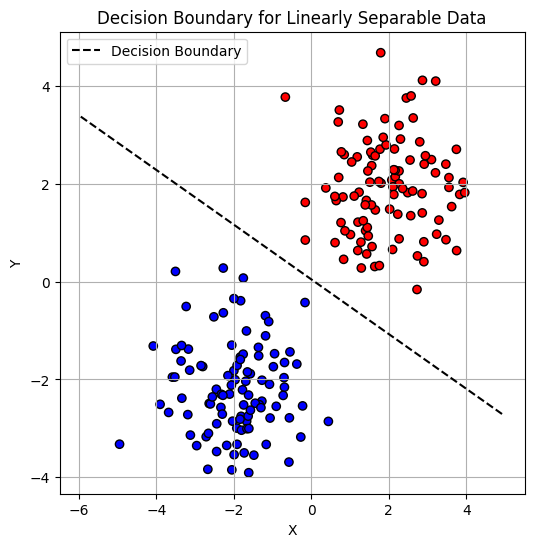

<ipython-input-8-378395707372>:16: RuntimeWarning: invalid value encountered in divide
  y_vals = -(coef[0] * x_vals + intercept) / coef[1]


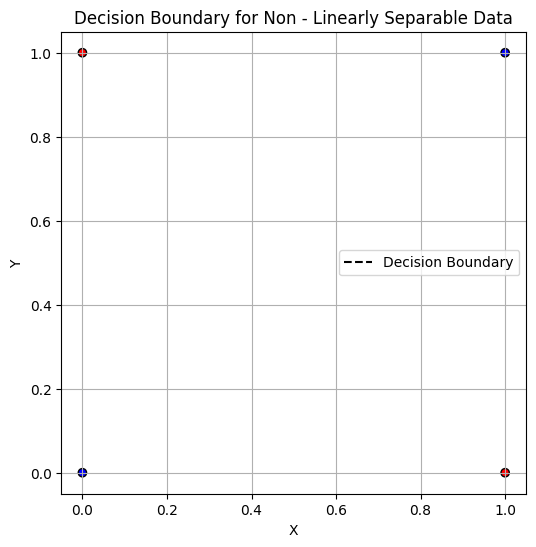

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(points, labels, model, title="Decision Boundary Visualization"):
    # Plot the points and colors
    colors = ['blue' if label == -1 else 'red' for label in labels.flatten()]
    plt.figure(figsize=(6, 6))
    plt.scatter(points[:, 0], points[:, 1], c=colors, marker='o', edgecolor='k')

    # Get the coefficients and intercept from the model
    coef = model.coef_[0]
    intercept = model.intercept_[0]

    # Calculate the decision boundary line
    x_vals = np.linspace(points[:, 0].min() - 1, points[:, 0].max() + 1, 100)
    y_vals = -(coef[0] * x_vals + intercept) / coef[1]

    # Plot the decision boundary line
    plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Use the function to plot the decision boundary
plot_decision_boundary(points, labels, linear_svc, title="Decision Boundary for Linearly Separable Data")
plot_decision_boundary(xor_points, xor_labels, non_linear_svc, title="Decision Boundary for Non - Linearly Separable Data")


## Model Optimization

Optimize the model and visualize decision boundaries for both datasets.

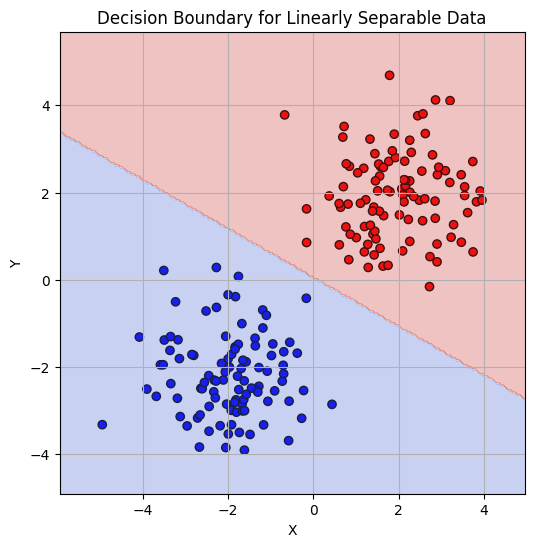

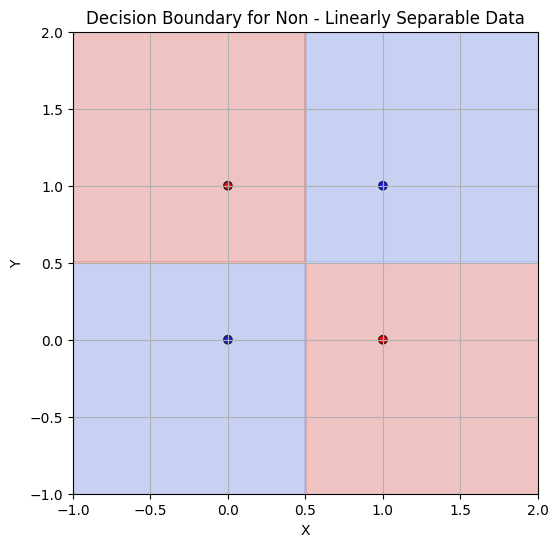

In [9]:
from sklearn.svm import LinearSVC, SVC

# Function to visualize decision boundary for any SVM model
def plot_decision_boundary(points, labels, model, title="Decision Boundary Visualization"):
    colors = ['blue' if label == -1 else 'red' for label in labels.flatten()]
    plt.figure(figsize=(6, 6))
    plt.scatter(points[:, 0], points[:, 1], c=colors, marker='o', edgecolor='k')

    # Define plot range and create a mesh grid
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    # Predict classes for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary as a contour
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)
    plt.grid(True)
    plt.show()

# 1. Optimize and visualize for the linearly separable data
linear_svc = LinearSVC(C=1.0, max_iter=10000)  # Adjust `C` as needed
linear_svc.fit(points, labels.ravel())
# plot_decision_boundary(points, labels, linear_svc, title="Optimized Decision Boundary for Linearly Separable Data")

# 2. Optimize and visualize for the XOR dataset
nonlinear_svc = SVC(kernel='rbf', C=1.0, gamma='auto')  # RBF kernel for non-linear data
nonlinear_svc.fit(xor_points, xor_labels.ravel())
# plot_decision_boundary(xor_points, xor_labels, nonlinear_svc, title="Decision Boundary for XOR Data (Non-linear)")

plot_decision_boundary(points, labels, linear_svc, title="Decision Boundary for Linearly Separable Data")
plot_decision_boundary(xor_points, xor_labels, nonlinear_svc, title="Decision Boundary for Non - Linearly Separable Data")

## Observations: Linear vs Non-Linear Classification

The model worked for the linearly separable dataset but failed for the XOR dataset. This is because LinearSVC can only learn linear decision boundaries. The XOR problem requires a non-linear boundary, which linear models cannot represent. A kernel-based SVM (e.g., RBF kernel) would be needed for the XOR dataset.

## Decision Boundary Uniqueness

Yes, the boundary is unique for the linearly separable case. SVMs find the optimal separating hyperplane that maximizes the margin between classes. This optimal solution is mathematically unique (given the same data and hyperparameters).

## Impact of Outliers on Decision Boundary

Create some outliers by flipping the class of randomly selected 8 points in the first dataset. Observe the change in the predicted decision boundary.